# Clustering

## Problem Statement

Students have to evaluate a lot of factors before taking a decision to join a university for their higher education requirements.
The objective of this project is to simplify the process of applying for appropriate universities which are of similar nature. 

`CRISP-ML(Q)` process model describes six phases:

1. Business and Data Understanding
2. Data Preparation
3. Model Building
4. Model Evaluation
5. Deployment
6. Monitoring and Maintenance

**Objective(s):** Maximize the convience of admission process

**Constraints:** Minimize the brain drain


**Success Criteria**

- **Business Success Criteria**: Reduce the application process time from anywhere between 20% to 40%

- **ML Success Criteria**: Achieve Silhoutte coefficient of atleast 0.6

- **Economic Success Criteria**: US Higher education department will see an increase in revenues by atleast 30%

**Proposed Plan:**
Grouping the available universities will allow to understand the characteristics of each group.

## Data Collection

Data: 
   The university details are obtained from the US Higher Education Body and is publicly available for students to access.

Data Dictionary:
- Dataset contains 25 university details
- 7 features are recorded for each university

Description:
- Univ - University Name
- State - Location (state) of the university
- SAT - Average SAT score for eligibility
- Top10 - % of students who ranked in top 10 in their previous academics
- Accept - % of students admitted to the universities
- SFRatio - Student to Faculty ratio
- Expenses - Overall cost in USD
- GradRate - % of students who graduate

#### Install the required packages if not available

In [4]:
# !pip install feature_engine
# !pip install dtale
# !pip install sklearn_pandas

**Importing required packages**

In [35]:
import numpy as np
import pandas as pd 
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from feature_engine.outliers import Winsorizer
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

### Suppress the Warnings

In [7]:
import warnings
warnings.filterwarnings("ignore")

**Import the data**

In [8]:
df = pd.read_excel(r'C:\Data\University_Clustering.xlsx')
df

,UnivID,Univ,State,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,1,Brown,RI,1310.0,89,22,13.0,22704,94.0
1,2,CalTech,CA,1415.0,100,25,6.0,63575,81.0
2,3,CMU,PA,1260.0,62,59,9.0,25026,72.0
3,4,Columbia,NY,1310.0,76,24,12.0,31510,NaN
4,5,Cornell,NY,1280.0,83,33,13.0,21864,90.0
5,6,Dartmouth,NH,1340.0,89,23,10.0,32162,95.0
6,7,Duke,NC,1315.0,90,30,12.0,31585,95.0
7,8,Georgetown,DC,NaN,74,24,12.0,20126,92.0
8,9,Harvard,MA,1400.0,91,14,11.0,39525,97.0
9,10,JohnsHopkins,MD,1305.0,75,44,7.0,58691,87.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   UnivID    25 non-null     int64  
 1   Univ      25 non-null     object 
 2   State     25 non-null     object 
 3   SAT       24 non-null     float64
 4   Top10     25 non-null     int64  
 5   Accept    25 non-null     int64  
 6   SFRatio   24 non-null     float64
 7   Expenses  25 non-null     int64  
 8   GradRate  24 non-null     float64
dtypes: float64(3), int64(4), object(2)
memory usage: 1.9+ KB


# EXPLORATORY DATA ANALYSIS (EDA) / DESCRIPTIVE STATISTICS

***1st Moment Business Decision (Measures of Central Tendency)***

1) Mean

2) Median

3) Mode

In [12]:
print(df.mean())
print('\n')
print(df.median())
print('\n')
print(df.mode())

UnivID         13.000000
SAT          1266.916667
Top10          76.480000
Accept         39.200000
SFRatio        12.708333
Expenses    27388.000000
GradRate       86.666667
dtype: float64


UnivID         13.0
SAT          1287.5
Top10          81.0
Accept         36.0
SFRatio        12.0
Expenses    27553.0
GradRate       90.0
dtype: float64


    UnivID          Univ State     SAT  Top10  Accept  SFRatio  Expenses  \
0        1         Brown    CA  1260.0   75.0    14.0     11.0      8704   
1        2           CMU    PA  1310.0   89.0    24.0     12.0      9066   
2        3       CalTech   NaN  1375.0   90.0    30.0      NaN     10185   
3        4      Columbia   NaN     NaN   91.0    44.0      NaN     11857   
4        5       Cornell   NaN     NaN   95.0     NaN      NaN     13349   
5        6     Dartmouth   NaN     NaN    NaN     NaN      NaN     15122   
6        7          Duke   NaN     NaN    NaN     NaN      NaN     15140   
7        8    Georgetown   NaN     NaN    N

***2nd Moment Business Decision (Measures of Dispersion)***

1) Variance

2) Standard deviation

3) Range (maximum - minimum)

In [13]:
print(df.var())
print('\n')
print(df.std())

UnivID      5.416667e+01
SAT         1.224643e+04
Top10       3.776767e+02
Accept      3.891667e+02
SFRatio     1.725906e+01
Expenses    2.080773e+08
GradRate    8.553623e+01
dtype: float64


UnivID          7.359801
SAT           110.663578
Top10          19.433905
Accept         19.727308
SFRatio         4.154402
Expenses    14424.883165
GradRate        9.248580
dtype: float64


***3rd Business Moment Decision (Skewness)***

Measure of asymmetry in the data distribution

In [14]:
df.skew()

UnivID      0.000000
SAT        -0.948996
Top10      -1.219756
Accept      0.867538
SFRatio     1.110628
Expenses    0.852350
GradRate   -0.964565
dtype: float64

***4th Business Moment Decision (Kurtosis)***

Measure of peakedness - represents the overall spread in the data

In [15]:
df.kurt()

UnivID     -1.200000
SAT         0.240543
Top10       0.700307
Accept      0.252908
SFRatio     2.171173
Expenses    0.638162
GradRate   -0.307285
dtype: float64

***Descriptive Statistics and Data Distribution Function***

In [11]:
df.describe()

,UnivID,SAT,Top10,Accept,SFRatio,Expenses,GradRate
count,25.000000,24.000000,25.000000,25.000000,24.000000,25.000000,24.000000
mean,13.000000,1266.916667,76.480000,39.200000,12.708333,27388.000000,86.666667
std,7.359801,110.663578,19.433905,19.727308,4.154402,14424.883165,9.248580
min,1.000000,1005.000000,28.000000,14.000000,6.000000,8704.000000,67.000000
25%,7.000000,1236.250000,74.000000,24.000000,10.750000,15140.000000,80.750000
50%,13.000000,1287.500000,81.000000,36.000000,12.000000,27553.000000,90.000000
75%,19.000000,1345.000000,90.000000,50.000000,14.250000,34870.000000,94.000000
max,25.000000,1415.000000,100.000000,90.000000,25.000000,63575.000000,97.000000


# Data Preprocessing

**Typecasting** :

As Python automatically interprets the data types. There may be a requirement for the data type to be converted. The process of converting one data type to another data type is called Typecasting.

Example: 
1) int to float

2) float to int

In [16]:
df.dtypes

UnivID        int64
Univ         object
State        object
SAT         float64
Top10         int64
Accept        int64
SFRatio     float64
Expenses      int64
GradRate    float64
dtype: object

The dataset contains UnivID which is being interpreted as Integer by Python. UnivID is an identity and a unique number given to each university. Hence it should be treated as a categorical data. We can convert the integer data to string type.

In [17]:
# Convert 'int64' to 'str' (string) type.

df.UnivID = df.UnivID.astype('str')
df.dtypes

UnivID       object
Univ         object
State        object
SAT         float64
Top10         int64
Accept        int64
SFRatio     float64
Expenses      int64
GradRate    float64
dtype: object

**Cleaning Unwanted columns**

UnivID is an identity to each university. Analytically it does not have any value (Nominal data). We can safely ignore the ID column by dropping the column.

In [18]:
df.drop(['UnivID'], axis = 1, inplace = True)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Univ      25 non-null     object 
 1   State     25 non-null     object 
 2   SAT       24 non-null     float64
 3   Top10     25 non-null     int64  
 4   Accept    25 non-null     int64  
 5   SFRatio   24 non-null     float64
 6   Expenses  25 non-null     int64  
 7   GradRate  24 non-null     float64
dtypes: float64(3), int64(3), object(2)
memory usage: 1.7+ KB


**Handling duplicates:**

If the dataset has multiple entries of the same record then we can remove the duplicate entries. In our dataset we dont have duplicates. In case of duplicates we will use function drop_duplicates()

In [20]:
duplicate = df.duplicated()  # Returns Boolean Series denoting duplicate rows.
duplicate
sum(duplicate)

0

In [21]:
# Removing Duplicates
df = df.drop_duplicates() # Returns DataFrame with duplicate rows removed.

**Missing Value Analysis**

***IMPUTATION:***

The process of dealing with missing values is called Imputation.

Most popular substitution based Imputation techniques are:

1) Mean imputation for numeric data

2) Mode imputation for non-numeric data

In [22]:
df.isnull().sum() # Check for missing values

Univ        0
State       0
SAT         1
Top10       0
Accept      0
SFRatio     1
Expenses    0
GradRate    1
dtype: int64

In [23]:
type(df["SAT"])

pandas.core.series.Series

In [24]:
type(df[["SAT"]])

pandas.core.frame.DataFrame

In [25]:
from sklearn.impute import SimpleImputer

# Mean Imputer 
mean_imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
df["SAT"] = pd.DataFrame(mean_imputer.fit_transform(df[["SAT"]]))

df["SAT"].isna().sum()

0

In [26]:
# Median Imputer
median_imputer = SimpleImputer(missing_values = np.nan, strategy = 'median')
df["SFRatio"] = pd.DataFrame(median_imputer.fit_transform(df[["SFRatio"]]))

df["SFRatio"].isna().sum()  # all records replaced by median 

0

In [27]:
# Random Imputer
from feature_engine.imputation import RandomSampleImputer

random_imputer = RandomSampleImputer(['GradRate'])
df["GradRate"] = pd.DataFrame(random_imputer.fit_transform(df[["GradRate"]]))

df["GradRate"].isna().sum()  # all records replaced by a random value

0

In [28]:
df.isna().sum()

Univ        0
State       0
SAT         0
Top10       0
Accept      0
SFRatio     0
Expenses    0
GradRate    0
dtype: int64

## Single code for Mean Imputation on the entire dataset.


#### Alternative option

In [30]:
df.fillna(df.mean(), inplace = True)

### Outliers Analysis:

Exceptional data values in a variable can be outliers. In case of outliers we can use one of the strategies of 3 R (Rectify, Retain, or Remove)

**Dividing Categorical and Numerical variables from dataset**

In [31]:
df_cate = df.iloc[:, :2]
df_cate.head()

,Univ,State
0,Brown,RI
1,CalTech,CA
2,CMU,PA
3,Columbia,NY
4,Cornell,NY


In [32]:
df_num = df.iloc[:, 2:]
df_num.head()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,1310.0,89,22,13.0,22704,94.0
1,1415.0,100,25,6.0,63575,81.0
2,1260.0,62,59,9.0,25026,72.0
3,1310.0,76,24,12.0,31510,87.0
4,1280.0,83,33,13.0,21864,90.0


**Box Plot**

Visualize numeric data using boxplot for outliers

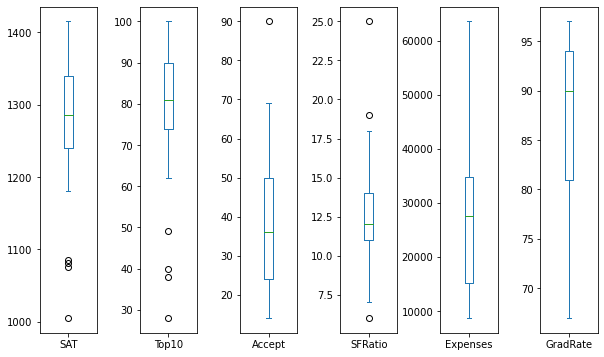

In [33]:
# Multiple boxplots in a single visualization.
# Columns with larger scales affect other columns. 
# Below code ensures each column gets its own y-axis.

# pandas plot() function with parameters kind = 'box' and subplots = True

df_num.plot(kind = 'box', subplots = True, sharey = False, figsize = (10, 6)) 

'''sharey True or 'all': x- or y-axis will be shared among all subplots.
False or 'none': each subplot x- or y-axis will be independent.'''


# increase spacing between subplots
plt.subplots_adjust(wspace = 0.75) # ws is the width of the padding between subplots, as a fraction of the average Axes width.
plt.show()  

Boxplots show outliers in: SAT, Top10, Accept, SFRatio.

***Outlier Analysis***: 
We shall use Winsorization Technique to treat outliers

Winsorization function rounds off the exceptional data points based on capping method used in parameters/hyperparameters section.

In [ ]:
# D-Tale
########

# pip install dtale
import dtale

d = dtale.show(df)
d.open_browser()

#### Install the required package if it is not already available
***Package to get winsorization function***

!pip install feature_engine       

In [36]:
# Winsorization for "SAT, Top10, Accept, SFRatio" column
winsor = Winsorizer(capping_method = 'iqr', # choose IQR rule boundary
                          tail = 'both', # cap left, right or both tails 
                          fold = 1.5,
                          variables = ['SAT'])

df_num['SAT'] = winsor.fit_transform(df_num[['SAT']]) # this is replacing the outliers to cap values


In [37]:
# Winsorization for "Top10" column
winsor = Winsorizer(capping_method = 'iqr', # choose IQR rule boundary
                          tail = 'both', # cap left, right or both tails 
                          fold = 1.5,
                          variables = ['Top10'])

df_num['Top10'] = winsor.fit_transform(df_num[['Top10']]) # this is replacing the outliers to cap values


In [38]:
# Winsorization for "Accept" column
winsor = Winsorizer(capping_method = 'iqr', # choose IQR rule boundary
                          tail = 'both', # cap left, right or both tails 
                          fold = 1.5,
                          variables = ['Accept'])

df_num['Accept'] = winsor.fit_transform(df_num[['Accept']]) # this is replacing the outliers to cap values

In [39]:
# Winsorization for "SFRatio" column
winsor = Winsorizer(capping_method = 'iqr', # choose IQR rule boundaries
                          tail = 'both', # cap left, right or both tails 
                          fold = 1.5,
                          variables = ['SFRatio'])

df_num['SFRatio'] = winsor.fit_transform(df_num[['SFRatio']]) # this is replacing the outliers to cap values

#### Verify for outliers post the treatment

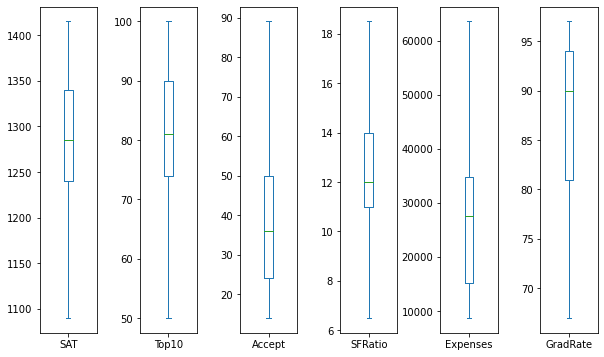

In [40]:
df_num.plot(kind = 'box', subplots = True, sharey = False, figsize = (10, 6)) #sharey = True shares the Y axis across all plots


# increase spacing between subplots
plt.subplots_adjust(wspace = 0.75) 
plt.show()  

**Zero and near zero variance**

   We dont have any values with near zero (or) zero variance. We can proceed with further data preprocessing steps.

In [41]:
df_num.var()

SAT         9.718958e+03
Top10       2.446267e+02
Accept      3.849733e+02
SFRatio     1.105583e+01
Expenses    2.080773e+08
GradRate    8.197667e+01
dtype: float64

**Discretization / Binning / Grouping:**

The process of converting continuous data into discrete number of bins.

The current business requirement does not justify the discretization/binning requirement for any column.

### Dummy Variable Creation

In [42]:
df.dtypes  # Verify the data types of the fields for the entire data

Univ         object
State        object
SAT         float64
Top10         int64
Accept        int64
SFRatio     float64
Expenses      int64
GradRate    float64
dtype: object

In [43]:
# Alternatively we can use:

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 0 to 24
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Univ      25 non-null     object 
 1   State     25 non-null     object 
 2   SAT       25 non-null     float64
 3   Top10     25 non-null     int64  
 4   Accept    25 non-null     int64  
 5   SFRatio   25 non-null     float64
 6   Expenses  25 non-null     int64  
 7   GradRate  25 non-null     float64
dtypes: float64(3), int64(3), object(2)
memory usage: 1.8+ KB


In [44]:
df_cate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Univ    25 non-null     object
 1   State   25 non-null     object
dtypes: object(2)
memory usage: 600.0+ bytes


In [45]:
print(df_cate.State.unique())
print('\n')

print(df_cate.State.value_counts())

['RI' 'CA' 'PA' 'NY' 'NH' 'NC' 'DC' 'MA' 'MD' 'IL' 'IN' 'NJ' 'TX' 'MI'
 'VA' 'WI' 'CT']


PA    3
CA    3
NY    2
MA    2
IL    2
IN    2
RI    1
TX    1
WI    1
VA    1
MI    1
MD    1
NJ    1
DC    1
NC    1
NH    1
CT    1
Name: State, dtype: int64


- Univ name is an identity and does not require to be converted into numeric values.

- STATE column is an important field in decision making hence it is to be converted into Numeric values.

In [46]:
# Applying One-Hot Encoding with get_dummies

df_cate = pd.get_dummies(df_cate, columns = ['State'], drop_first = True)

In [47]:
df_cate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 0 to 24
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Univ      25 non-null     object
 1   State_CT  25 non-null     uint8 
 2   State_DC  25 non-null     uint8 
 3   State_IL  25 non-null     uint8 
 4   State_IN  25 non-null     uint8 
 5   State_MA  25 non-null     uint8 
 6   State_MD  25 non-null     uint8 
 7   State_MI  25 non-null     uint8 
 8   State_NC  25 non-null     uint8 
 9   State_NH  25 non-null     uint8 
 10  State_NJ  25 non-null     uint8 
 11  State_NY  25 non-null     uint8 
 12  State_PA  25 non-null     uint8 
 13  State_RI  25 non-null     uint8 
 14  State_TX  25 non-null     uint8 
 15  State_VA  25 non-null     uint8 
 16  State_WI  25 non-null     uint8 
dtypes: object(1), uint8(16)
memory usage: 800.0+ bytes


In [48]:
# The dimension of the dataset after One-Hot Encoding

df_cate.shape

(25, 17)

In [49]:
df_cate.head()

,Univ,State_CT,State_DC,State_IL,State_IN,State_MA,State_MD,State_MI,State_NC,State_NH,State_NJ,State_NY,State_PA,State_RI,State_TX,State_VA,State_WI
0,Brown,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,CalTech,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,CMU,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,Columbia,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,Cornell,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


# **Graphical Representation**


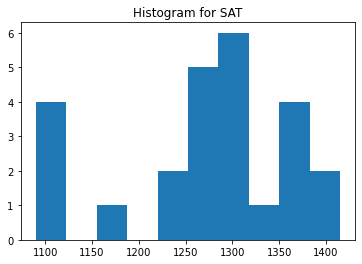

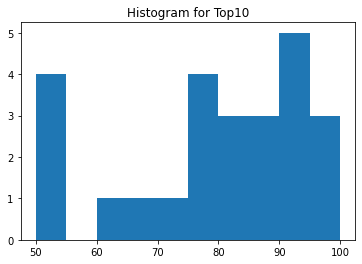

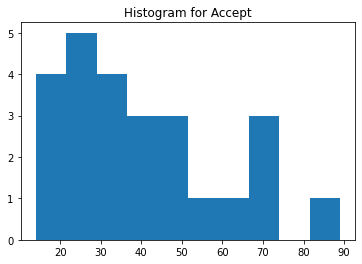

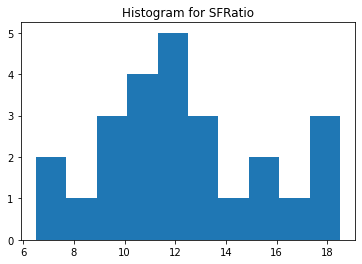

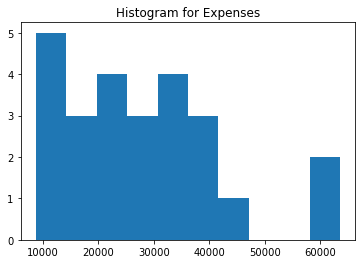

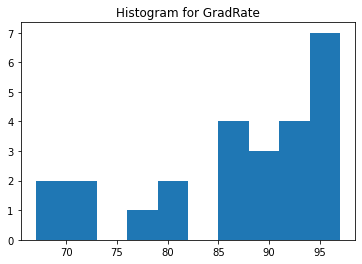

In [50]:
# Histogram describes the spread of data

for i in df_num.columns:
  plt.hist(x = df_num[i])
  plt.title("Histogram for " + str(i))
  plt.show()


((array([-1.9213301 , -1.50368257, -1.24941883, -1.0573306 , -0.897955  ,
         -0.75865603, -0.63273432, -0.51614096, -0.40618759, -0.30094875,
         -0.19894932, -0.09898372,  0.        ,  0.09898372,  0.19894932,
          0.30094875,  0.40618759,  0.51614096,  0.63273432,  0.75865603,
          0.897955  ,  1.0573306 ,  1.24941883,  1.50368257,  1.9213301 ]),
  array([1090.        , 1090.        , 1090.        , 1090.        ,
         1180.        , 1225.        , 1240.        , 1255.        ,
         1260.        , 1260.        , 1266.91666667, 1280.        ,
         1285.        , 1290.        , 1305.        , 1310.        ,
         1310.        , 1315.        , 1340.        , 1360.        ,
         1375.        , 1375.        , 1380.        , 1400.        ,
         1415.        ])),
 (98.76659036154764, 1271.4766666666667, 0.9585447047103507))

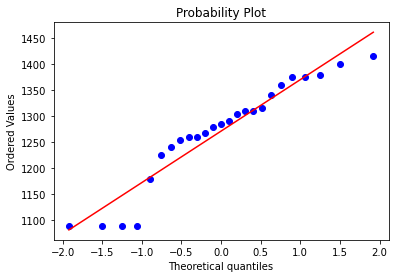

In [51]:
# Normal Quantile-Quantile Plot - Helps in understanding the distribution of the data - Normal distribution or not
import scipy.stats as stats
import pylab

# Checking Whether data is normally distributed
stats.probplot(df_num.SAT, dist = "norm", plot = pylab)

((array([-1.9213301 , -1.50368257, -1.24941883, -1.0573306 , -0.897955  ,
         -0.75865603, -0.63273432, -0.51614096, -0.40618759, -0.30094875,
         -0.19894932, -0.09898372,  0.        ,  0.09898372,  0.19894932,
          0.30094875,  0.40618759,  0.51614096,  0.63273432,  0.75865603,
          0.897955  ,  1.0573306 ,  1.24941883,  1.50368257,  1.9213301 ]),
  array([ 50.,  50.,  50.,  50.,  62.,  65.,  74.,  75.,  75.,  76.,  77.,
          80.,  81.,  83.,  85.,  89.,  89.,  90.,  90.,  91.,  91.,  94.,
          95.,  95., 100.])),
 (15.548174662321602, 78.28, 0.9511295549439862))

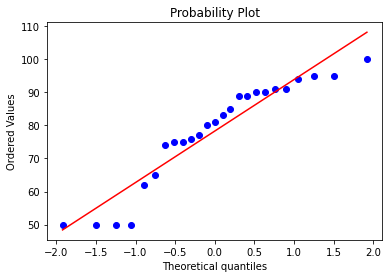

In [52]:
# Checking Whether data is normally distributed
stats.probplot(df_num.Top10, dist = "norm", plot = pylab)

((array([-1.9213301 , -1.50368257, -1.24941883, -1.0573306 , -0.897955  ,
         -0.75865603, -0.63273432, -0.51614096, -0.40618759, -0.30094875,
         -0.19894932, -0.09898372,  0.        ,  0.09898372,  0.19894932,
          0.30094875,  0.40618759,  0.51614096,  0.63273432,  0.75865603,
          0.897955  ,  1.0573306 ,  1.24941883,  1.50368257,  1.9213301 ]),
  array([14., 14., 19., 20., 22., 23., 24., 24., 25., 30., 30., 33., 36.,
         39., 40., 42., 44., 44., 50., 54., 59., 67., 68., 69., 89.])),
 (19.806179416701234, 39.16, 0.9658230149511989))

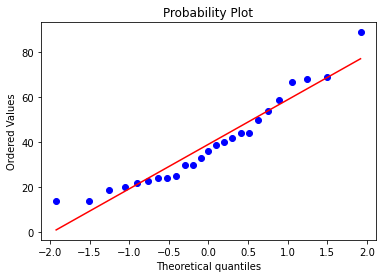

In [53]:
# Checking Whether data is normally distributed
stats.probplot(df_num.Accept, dist = "norm", plot = pylab)

((array([-1.9213301 , -1.50368257, -1.24941883, -1.0573306 , -0.897955  ,
         -0.75865603, -0.63273432, -0.51614096, -0.40618759, -0.30094875,
         -0.19894932, -0.09898372,  0.        ,  0.09898372,  0.19894932,
          0.30094875,  0.40618759,  0.51614096,  0.63273432,  0.75865603,
          0.897955  ,  1.0573306 ,  1.24941883,  1.50368257,  1.9213301 ]),
  array([ 6.5,  7. ,  8. ,  9. , 10. , 10. , 11. , 11. , 11. , 11. , 12. ,
         12. , 12. , 12. , 12. , 13. , 13. , 13. , 14. , 15. , 16. , 17. ,
         18. , 18.5, 18.5])),
 (3.4058243652179456, 12.42, 0.9800284234738135))

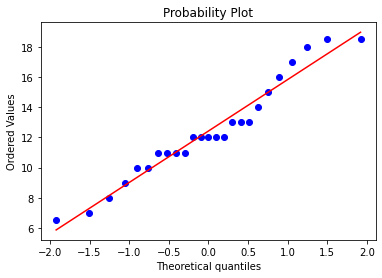

In [54]:
# Checking Whether data is normally distributed
stats.probplot(df_num.SFRatio, dist = "norm", plot = pylab)

((array([-1.9213301 , -1.50368257, -1.24941883, -1.0573306 , -0.897955  ,
         -0.75865603, -0.63273432, -0.51614096, -0.40618759, -0.30094875,
         -0.19894932, -0.09898372,  0.        ,  0.09898372,  0.19894932,
          0.30094875,  0.40618759,  0.51614096,  0.63273432,  0.75865603,
          0.897955  ,  1.0573306 ,  1.24941883,  1.50368257,  1.9213301 ]),
  array([ 8704,  9066, 10185, 11857, 13349, 15122, 15140, 15470, 20126,
         21864, 22704, 25026, 27553, 28052, 30220, 31510, 31585, 32162,
         34870, 36450, 38380, 39525, 43514, 58691, 63575], dtype=int64)),
 (14567.431669324984, 27387.999999999996, 0.96623519023699))

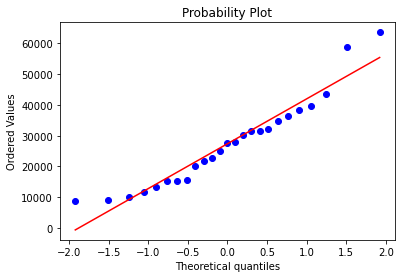

In [55]:
# Checking Whether data is normally distributed
stats.probplot(df_num.Expenses, dist = "norm", plot = pylab)

((array([-1.9213301 , -1.50368257, -1.24941883, -1.0573306 , -0.897955  ,
         -0.75865603, -0.63273432, -0.51614096, -0.40618759, -0.30094875,
         -0.19894932, -0.09898372,  0.        ,  0.09898372,  0.19894932,
          0.30094875,  0.40618759,  0.51614096,  0.63273432,  0.75865603,
          0.897955  ,  1.0573306 ,  1.24941883,  1.50368257,  1.9213301 ]),
  array([67., 69., 71., 72., 78., 80., 81., 85., 87., 87., 87., 89., 90.,
         90., 91., 92., 92., 93., 94., 94., 95., 95., 95., 96., 97.])),
 (8.885437639535027, 86.68, 0.9389573388725366))

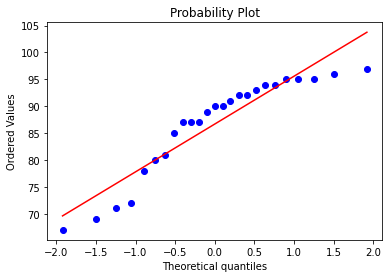

In [56]:
# Checking Whether data is normally distributed
stats.probplot(df_num.GradRate, dist = "norm", plot = pylab)

### Concatenate the Entire Data

In [57]:
df1 = pd.concat([df_cate, df_num], axis = 1)  # Preprocessed data for clustering
df1.head()

,Univ,State_CT,State_DC,State_IL,State_IN,State_MA,State_MD,State_MI,State_NC,State_NH,...,State_RI,State_TX,State_VA,State_WI,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1310.0,89.0,22.0,13.0,22704,94.0
1,CalTech,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1415.0,100.0,25.0,6.5,63575,81.0
2,CMU,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1260.0,62.0,59.0,9.0,25026,72.0
3,Columbia,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1310.0,76.0,24.0,12.0,31510,87.0
4,Cornell,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1280.0,83.0,33.0,13.0,21864,90.0


In [58]:
df1.shape

(25, 23)

In [59]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 0 to 24
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Univ      25 non-null     object 
 1   State_CT  25 non-null     uint8  
 2   State_DC  25 non-null     uint8  
 3   State_IL  25 non-null     uint8  
 4   State_IN  25 non-null     uint8  
 5   State_MA  25 non-null     uint8  
 6   State_MD  25 non-null     uint8  
 7   State_MI  25 non-null     uint8  
 8   State_NC  25 non-null     uint8  
 9   State_NH  25 non-null     uint8  
 10  State_NJ  25 non-null     uint8  
 11  State_NY  25 non-null     uint8  
 12  State_PA  25 non-null     uint8  
 13  State_RI  25 non-null     uint8  
 14  State_TX  25 non-null     uint8  
 15  State_VA  25 non-null     uint8  
 16  State_WI  25 non-null     uint8  
 17  SAT       25 non-null     float64
 18  Top10     25 non-null     float64
 19  Accept    25 non-null     float64
 20  SFRatio   25 non-null     float64


## Bivariate Analysis

**Scatter Plot**

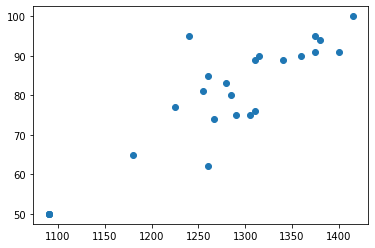

In [61]:
plt.scatter(x = df1['SAT'], y = df1['Top10']) 

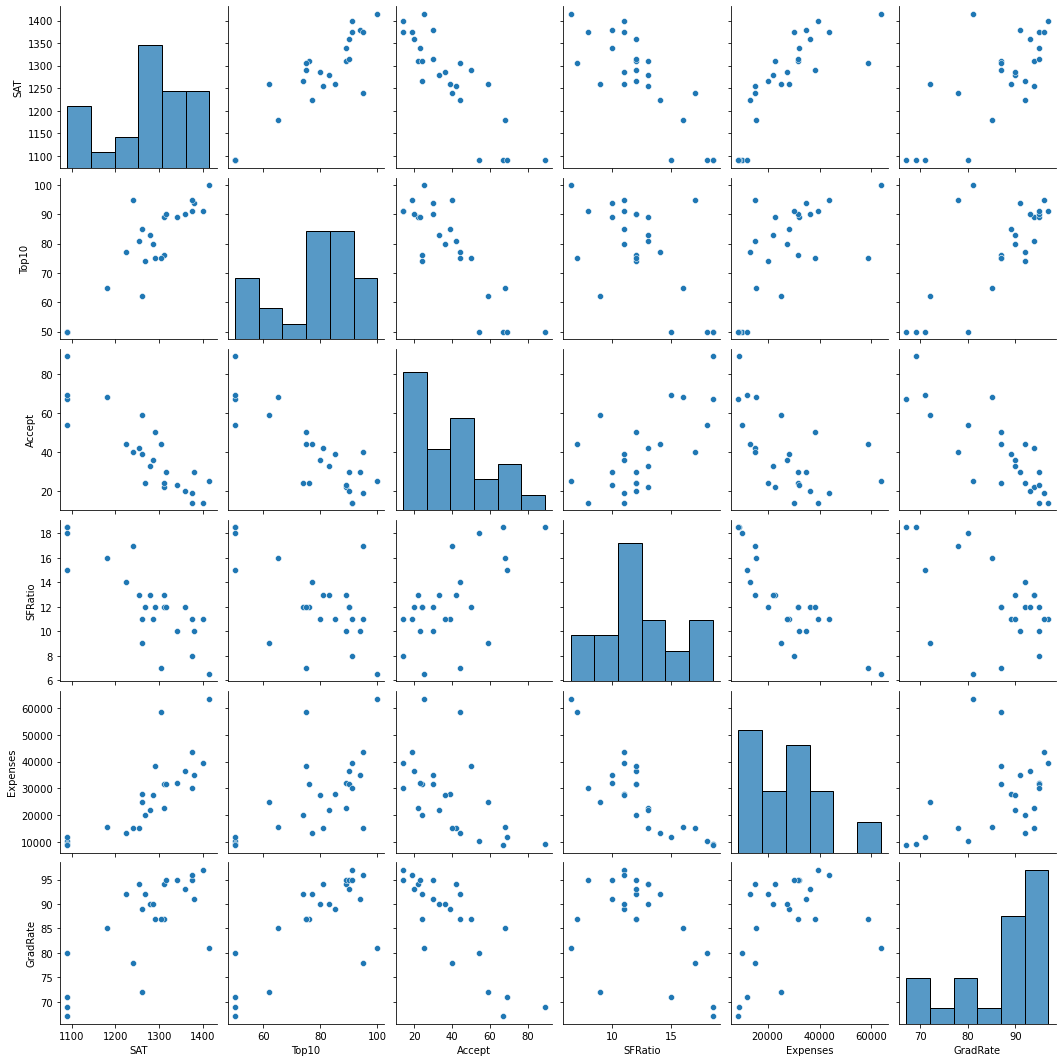

In [62]:
sns.pairplot(df_num)   # Use numerical variables to scatter plots


**Heatmap**

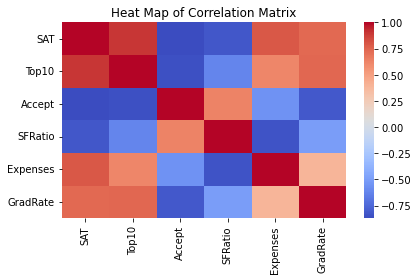

In [63]:
corrmatrix = df_num.corr(method = "pearson")

sns.heatmap(corrmatrix, xticklabels = corrmatrix.columns, yticklabels = corrmatrix.columns, cmap = "coolwarm")
plt.title('Heat Map of Correlation Matrix')
plt.tight_layout()
plt.show()

### Scaling using Normalization:

The scale/magnitude of the data will be converted to min = 0 and max = 1

In [64]:
def norm_func(i):
  x =(i - i.min()) / (i.max() - i.min())
  return(x)

In [65]:
df_norm = norm_func(df1.iloc[:, 1:])

In [66]:
df_norm.describe()

,State_CT,State_DC,State_IL,State_IN,State_MA,State_MD,State_MI,State_NC,State_NH,State_NJ,...,State_RI,State_TX,State_VA,State_WI,SAT,Top10,Accept,SFRatio,Expenses,GradRate
count,25.00,25.00,25.000000,25.000000,25.000000,25.00,25.00,25.00,25.00,25.00,...,25.00,25.00,25.00,25.00,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,0.04,0.04,0.080000,0.080000,0.080000,0.04,0.04,0.04,0.04,0.04,...,0.04,0.04,0.04,0.04,0.558390,0.565600,0.335467,0.493333,0.340508,0.656000
std,0.20,0.20,0.276887,0.276887,0.276887,0.20,0.20,0.20,0.20,0.20,...,0.20,0.20,0.20,0.20,0.303338,0.312811,0.261610,0.277086,0.262887,0.301803
min,0.00,0.00,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00,0.00,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.461538,0.480000,0.133333,0.375000,0.117293,0.466667
50%,0.00,0.00,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.600000,0.620000,0.293333,0.458333,0.343515,0.766667
75%,0.00,0.00,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.769231,0.800000,0.480000,0.625000,0.476864,0.900000
max,1.00,1.00,1.000000,1.000000,1.000000,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# CLUSTERING MODEL BUILDING

### KMeans Clustering

In [67]:
# Libraries for creating scree plot or elbow curve 
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [69]:
###### scree plot or elbow curve ############
TWSS = []
k = list(range(2, 9))

for i in k:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df_norm)
    TWSS.append(kmeans.inertia_)

TWSS

[24.479432160628026,
 21.855973958986496,
 19.360150666748112,
 17.790767435924213,
 16.14121608184872,
 14.503710277434113,
 12.802310724602453]

## Creating a scree plot to find out no.of cluster

Text(0, 0.5, 'total_within_SS')

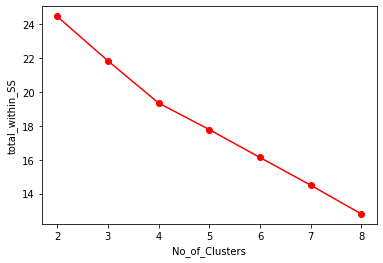

In [70]:
plt.plot(k, TWSS, 'ro-'); plt.xlabel("No_of_Clusters"); plt.ylabel("total_within_SS")

## Using KneeLocator

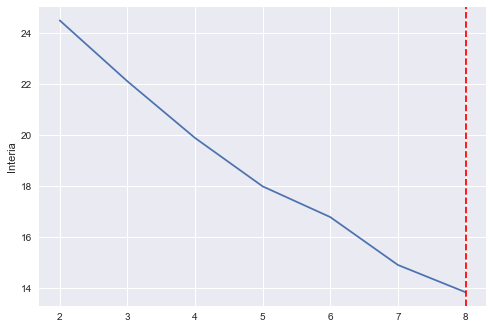

In [89]:
List = []

for k in range(2, 9):
    kmeans = KMeans(n_clusters = k, init = "random", max_iter = 30, random_state = 1, n_init = 10) 
    kmeans.fit(df_norm)
    List.append(kmeans.inertia_)

    
# Refer the link to understand the parameters used: https://kneed.readthedocs.io/en/stable/parameters.html    
from kneed import KneeLocator
kl = KneeLocator(range(2, 9), List, curve = 'convex') 
# The line is pretty linear hence Kneelocator is not able to detect the knee/elbow appropriately
kl.elbow
plt.style.use("seaborn")
plt.plot(range(2, 9), List)
plt.xticks(range(2, 9))
plt.ylabel("Interia")
plt.axvline(x = kl.elbow, color = 'r', label = 'axvline - full height', ls = '--')
plt.show()

## Detecting the best k=4 using TWSS value from scree plot

In [91]:
model = KMeans(n_clusters = 4)
yy = model.fit(df_norm)

We can see labels of cluster

In [92]:
model.labels_

array([0, 1, 2, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 2, 1, 3, 1, 3, 0, 0, 0, 2,
       0, 3, 1])

In [93]:
mb = pd.Series(model.labels_) 

In [94]:
df['clust'] = mb # creating a  new column and assigning it to new column 

In [95]:
df.head()

,Univ,State,SAT,Top10,Accept,SFRatio,Expenses,GradRate,clust
0,Brown,RI,1310.0,89,22,13.0,22704,94.0,0
1,CalTech,CA,1415.0,100,25,6.0,63575,81.0,1
2,CMU,PA,1260.0,62,59,9.0,25026,72.0,2
3,Columbia,NY,1310.0,76,24,12.0,31510,87.0,0
4,Cornell,NY,1280.0,83,33,13.0,21864,90.0,0


In [96]:
x = df.iloc[:, 3:].values

# 3D Scatter plot 

In [97]:
# Cluster according to any three Attributes

<IPython.core.display.Javascript object>


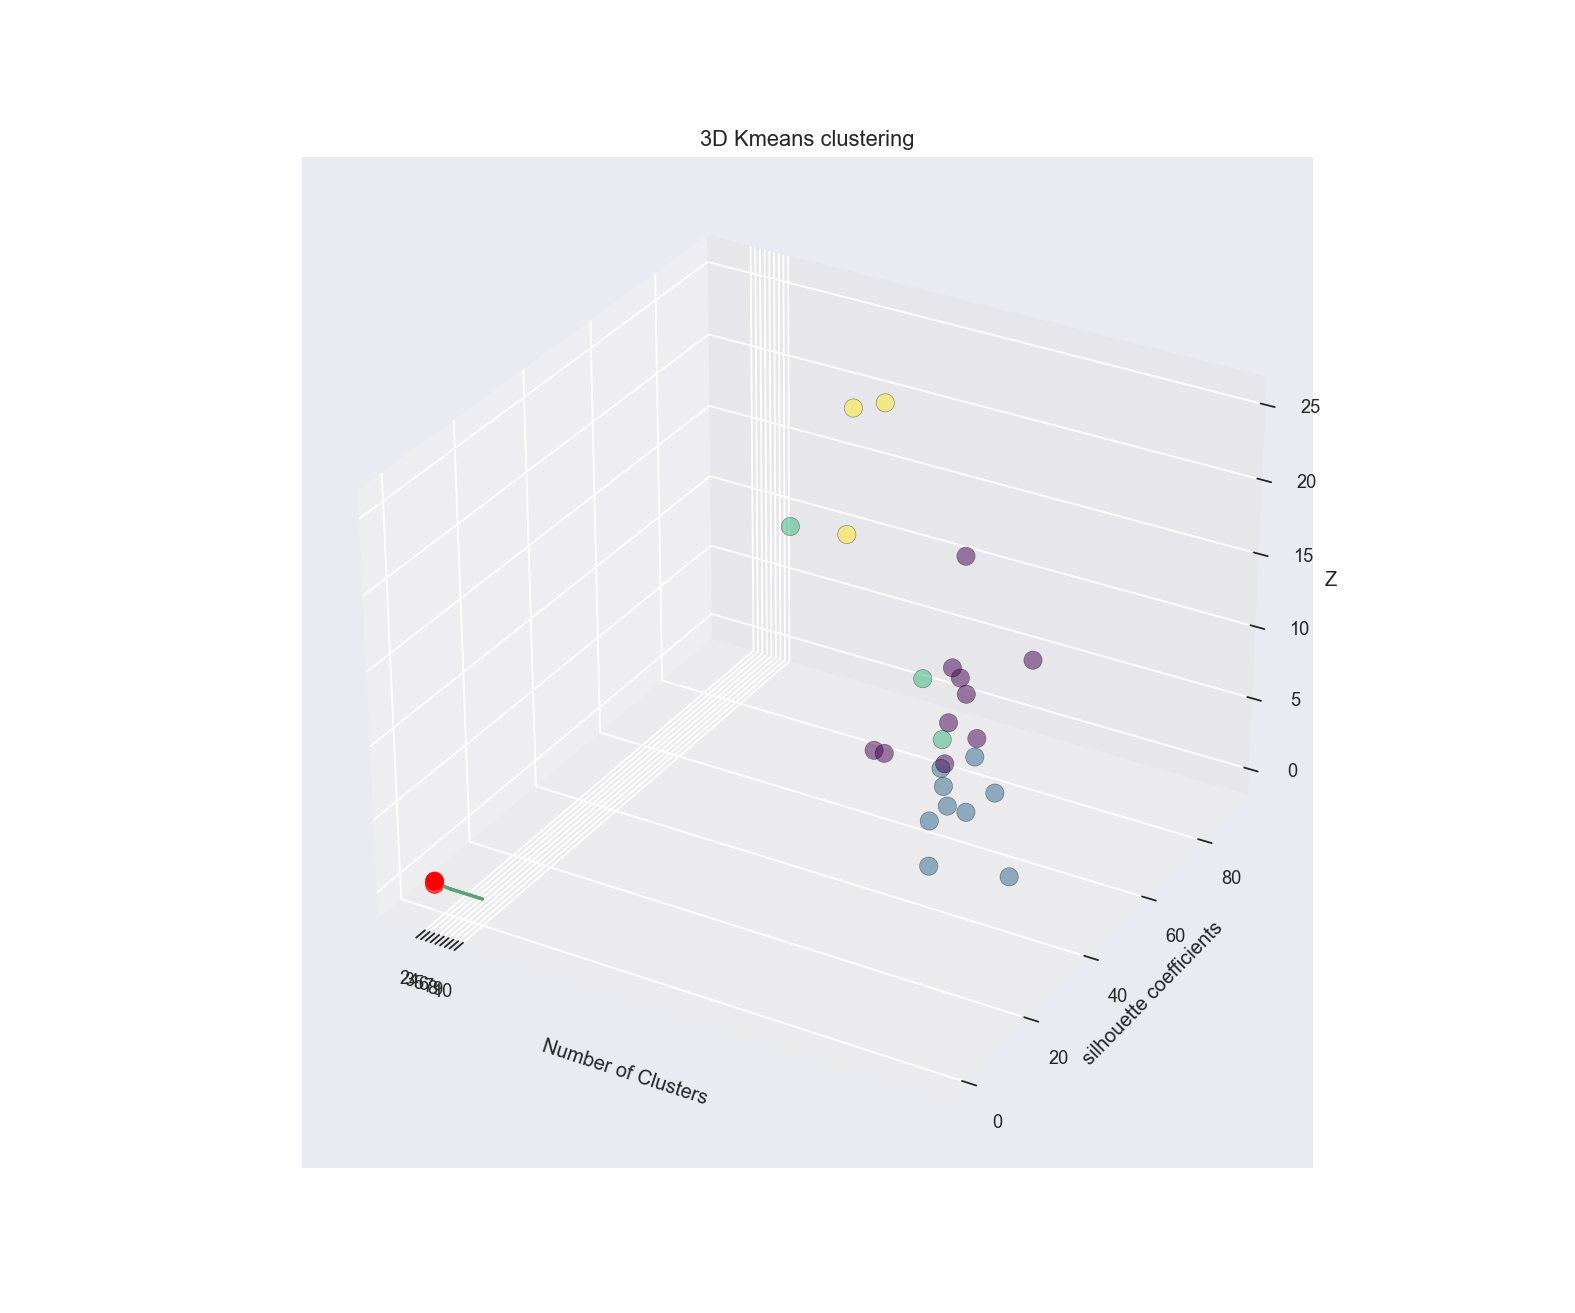

In [98]:
# plot clusters and centroids
%matplotlib notebook
fig = plt.figure(figsize = (12,10))
ax = fig.add_subplot(111, projection = '3d')
#syntax
##ax.scatter(x , y , z , c = , cmap = , marker = , edgecolor = , s = , alpha)
ax.scatter(x[:,0], x[:,1], x[:,2], c=model.labels_, cmap='viridis', marker='o', edgecolor='k', s = 100, alpha = 0.5)
ax.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], model.cluster_centers_[:,2], s = 100, c = 'r', marker='o', label = 'Centroid')
ax.set_title("3D Kmeans clustering")
ax.set_xlabel("X")
ax.set_ylabel("Y")   
ax.set_zlabel("Z")
plt.show()

## Cluster Evaluation

**Silhouette coefficient:**  

Silhouette coefficient is a Metric it is used for calculating goodness of clustering technique and the value ranges is (-1 to +1). It tells how similar an object is to its own cluster (cohesion) compared to other clusters (separation).

A score of 1 denotes the best meaning that the data point is very compact within the cluster to which it belongs and far away from the other clusters. 

Values near 0 denote overlapping clusters.


In [99]:
from sklearn import metrics

In [100]:
metrics.silhouette_score(df_norm, model.labels_)

0.13538248885189821

**Calinski Harabasz:**

Higher value of CH index means cluster are well separated. There is no acceptable ot cut-off value defined.

In [101]:
metrics.calinski_harabasz_score(df_norm, model.labels_)

4.6853045407324245

**Davies-Bouldin Index:**

Unlike the previous two metrics, this score measures the similarity of clusters.

The lower the score the better separation there is between your clusters.

In [102]:
metrics.davies_bouldin_score(df_norm, model.labels_)

1.7894357851399423

### Evaluation of Number of Clusters using Silhouette Coefficient Technique

In [111]:
from sklearn.metrics import silhouette_score

silhouette_coefficients = []

for k in range (2, 11):
    kmeans = KMeans(n_clusters = k, init = "random", random_state = 1)
    kmeans.fit(df_norm)
    score = silhouette_score(df_norm, kmeans.labels_)
    k = k
    Sil_coff = score
    silhouette_coefficients.append([k, Sil_coff])

In [112]:
silhouette_coefficients

[[2, 0.23298515684997942],
 [3, 0.09962726110001235],
 [4, 0.10154034415233065],
 [5, 0.1196212003353939],
 [6, 0.11875660299293125],
 [7, 0.15239447678689935],
 [8, 0.140173657016193],
 [9, 0.15798578318720788],
 [10, 0.16929930844849875]]

Shilhouette Coeffficients shows, the number of clusters `k = 2` as the best value